In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder 
%pip install h5py graphviz pydot

data = pd.read_csv('Loan_Data.csv')
df = data.copy()
df

Note: you may need to restart the kernel to use updated packages.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.dropna(inplace = True)

In [5]:
print(f'dataframe rows: {df.shape[0]} \ndataframe columns: {df.shape[1]} \n')
cats = df.select_dtypes(include = ['object', 'category'])
nums = df.select_dtypes(include = 'number')

display(cats.head(3))
display(nums.head(3))

dataframe rows: 480 
dataframe columns: 13 



,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,1,4583,1508.0,128.0,360.0,1.0
2,0,3000,0.0,66.0,360.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0


In [4]:
df['Dependents'].sample(200).values
df.Dependents = df['Dependents'].str.replace('+', '')
df.Dependents = df.Dependents.astype(int)
df.Dependents.dtypes

dtype('int32')

In [6]:
frame = df

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in cats:
  frame[i] = encoder.fit_transform(frame[i])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in nums:
  frame[[i]] = scaler.fit_transform(frame[[i]])

print(f"Transformed Dataset")
display(frame.head())

y = frame.Loan_Status
x = frame.drop(['Loan_Status'], axis = 1)

Transformed Dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,0.218599,0,0,-0.137970,-0.027952,-0.208089,0.275542,0.413197,0,0
2,1,1,1,-0.762033,0,1,-0.417536,-0.604633,-0.979001,0.275542,0.413197,2,1
3,2,1,1,-0.762033,1,0,-0.491180,0.297100,-0.307562,0.275542,0.413197,2,1
4,3,1,0,-0.762033,0,0,0.112280,-0.604633,-0.046446,0.275542,0.413197,2,1
5,4,1,1,1.199231,0,1,0.009319,0.999978,1.520245,0.275542,0.413197,2,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

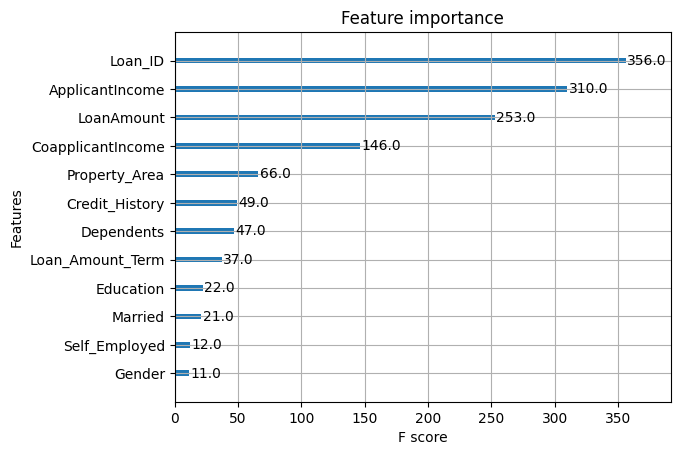

In [7]:
import xgboost as xgb 
model = xgb.XGBClassifier()
model.fit(x, y)

xgb.plot_importance(model)

In [21]:
sel = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome',
       'Dependents', 'Property_Area',
       'Credit_History', 'Loan_Amount_Term', 'Education', 'Married', 'Self_Employed']
new_df = df[sel]
new_df.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Education,Married,Self_Employed
1,-0.137970,-0.208089,-0.027952,0.218599,0,0.413197,0.275542,0,1,0
2,-0.417536,-0.979001,-0.604633,-0.762033,2,0.413197,0.275542,0,1,1
3,-0.491180,-0.307562,0.297100,-0.762033,2,0.413197,0.275542,1,1,0
4,0.112280,-0.046446,-0.604633,-0.762033,2,0.413197,0.275542,0,0,0
5,0.009319,1.520245,0.999978,1.199231,2,0.413197,0.275542,0,1,1


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.10, random_state = 476577, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (432, 10)
x_test: (48, 10)
y_train: (432,)
y_test: (48,)


In [29]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(units= 10, activation='relu'), 
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15) 

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6805 - loss: 0.6764
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7674 - loss: 0.6656 
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7439 - loss: 0.6581  
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7309 - loss: 0.6408
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7752 - loss: 0.6086 
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7481 - loss: 0.6170
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7618 - loss: 0.5942 
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.5666
Epoch 9/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.5442  
Epoch 10/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.5431
Epoch 11/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7946 - loss: 0.5367  
Epoch 12/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [30]:
score = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test Loss: {score[0]}\Test Accuracy: {score[1]}')

Test Loss: 0.47601190209388733\Test Accuracy: 0.7916666865348816


In [31]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  
outcome = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
outcome

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


,Actual,Predicted
519,0,1
310,1,1
179,0,0
455,1,1
465,1,1
438,0,0
145,1,1
300,0,0
136,0,1
31,0,1


              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           1       0.94      0.79      0.86        39

    accuracy                           0.79        48
   macro avg       0.70      0.79      0.72        48
weighted avg       0.85      0.79      0.81        48



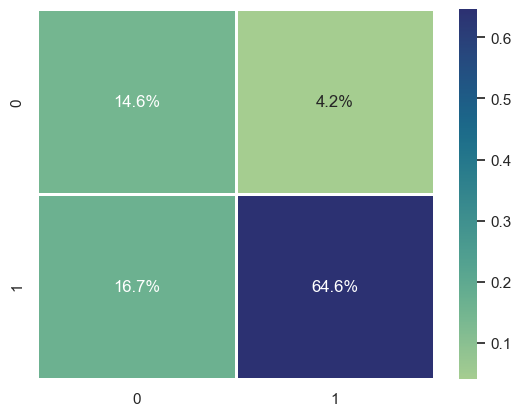

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

revealer = confusion_matrix(y_pred, y_test)
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

print(classification_report(y_pred, y_test))

In [35]:
model.save("Loan.h5")